# data cleaning

In [3]:
from google.colab import drive

drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
import dask.dataframe as dd
import pandas as pd
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import numpy as np

# Load the R base library
base = importr('base')

In [48]:
dtype = {'user_ratings_total': float, 'editorial_summary': str}
df = dd.read_csv('/gdrive/Shareddrives/從資料學習2/Dataset & code/clean/restaurant_data_output_merge_ewe.csv', dtype=dtype)

df_tour = dd.read_csv('/gdrive/Shareddrives/從資料學習2/Dataset & code/clean/tour_data_output_merge_ewe.csv', dtype=dtype)
df_tour['user_ratings_total'] = df_tour['user_ratings_total'].fillna(0).astype('int64')
df_tour['user_ratings_total'] = df_tour['user_ratings_total'].astype('Int64')


In [ ]:
print(len(df))
print(len(df_tour))

2349
449


In [ ]:
counts = df.groupby("place_id").size().compute()
duplicated_count = (counts > 1).sum()
print("Number of duplicated place_id values:", duplicated_count)


Number of duplicated place_id values: 0


In [ ]:
col = ['serves_breakfast', 'serves_brunch', 'serves_lunch', 'serves_dinner']
true_count= df['serves_breakfast'].value_counts().compute().get(True, 0)
false_count=df['serves_breakfast'].value_counts().compute().get(False, 0)
nan_count = df[col].isna().sum().compute()[0]

print(nan_count)
print(true_count)
print(false_count)

922
0
0


In [ ]:
df.head()

,place_id,name,business_status,wheelchair_accessible_entrance,type,rating,editorial_summary,user_ratings_total,price_level,formatted_phone_number,...,"location(lat,lng)",reviews_text,serves_breakfast,serves_brunch,serves_lunch,serves_dinner,serves_vegetarian_food,keywords,lat,lng
0,ChIJaU_-FyqrQjQRbLmzDXFaj5E,馬友友印度清真餐廳,OPERATIONAL,True,"['restaurant', 'point_of_interest', 'food', 'e...",4.7,"{'language': 'zh-TW', 'overview': '清真認證的休閒餐廳，提...",2091.0,2.0,02 2711 2067,...,"{'lat': 25.04102259999999, 'lng': 121.5497197}",['甜點非常不推薦 太甜了 不知道在吃什麼東西的甜點 烤餅跟腰果雞咖哩還不錯 但我不喜歡店員...,False,False,True,True,True,"['咖哩', '烤餅', '非常', '甜點', '推薦', '店員', '口味', '烤牛...",25.041023,121.549720
1,ChIJJXnO0barQjQR0ZJz1JGJ8v4,馬友友印度餐廳酒吧+水煙館,OPERATIONAL,True,"['bar', 'restaurant', 'food', 'point_of_intere...",4.7,"{'language': 'zh-TW', 'overview': '供應印度與中式餐點的新...",2125.0,NaN,02 2500 6186,...,"{'lat': 25.0458202, 'lng': 121.5332625}",['咖喱口味多元，奶油、菠菜、香料咖喱\n有羊肉、雞、海鮮、乳酪配料\n\n推薦🌟坦督碳烤優...,NaN,False,True,True,True,"['香料', '咖喱', '雞肉', '烤餅', '風格', '咖哩', '肚皮舞', '味...",25.045820,121.533263
2,ChIJA35dJHyrQjQRJ-sD3kSwWUY,Mellow Bar & Restaurant-東區精釀啤酒|聚餐餐廳|必吃餐酒館|網美餐酒...,OPERATIONAL,NaN,"['restaurant', 'point_of_interest', 'food', 'e...",4.9,NaN,518.0,NaN,02 2771 9907,...,"{'lat': 25.0397848, 'lng': 121.5522774}",['忠孝敦化站明曜百貨這個出口從216巷進來\n很容易找到，餐點尚可，談不上美味佳餚，配酒菜...,NaN,NaN,NaN,True,NaN,"['餐點', '感覺', '好喝', '餐酒館', '不過', '美式', '有點', '調...",25.039785,121.552277
3,ChIJ21GPVhKsQjQRO3C5Xb-roFY,星期五美式餐廳（美麗華）,OPERATIONAL,True,"['restaurant', 'food', 'point_of_interest', 'e...",4.1,"{'language': 'zh-TW', 'overview': '氣氛歡樂的連鎖休閒餐廳...",2401.0,NaN,02 2175 3358,...,"{'lat': 25.0836081, 'lng': 121.5572275}",['人均一千塊就能吃到非常豐盛的餐廳\n\n豬肋排還是用田納西威士忌燒烤醬搭配最棒\n這個醬...,NaN,NaN,True,True,NaN,"['起司', '沙拉', '這個', '濃湯', '牛排', '搭配', '蕃茄', '豬肋...",25.083608,121.557227
4,ChIJy0NrQeSrQjQRVlv2fBcHVEA,非常泰 - 復興店,OPERATIONAL,False,"['restaurant', 'food', 'point_of_interest', 'e...",4.4,NaN,1546.0,2.0,02 2546 6745,...,"{'lat': 25.0591667, 'lng': 121.5444444}",['\\瓦城旗下時尚又食尚的泰式餐廳！/\n\n👍🏼白飯吃到飽\n👍🏼飲料超好喝\n👍🏼用餐...,False,False,True,True,NaN,"['用餐', '泰式', '超級', '蝦餅', '時間', '選擇', '餐點', '不過...",25.059167,121.544444


# restaurant

user_ratings_total/rating -> spatter plot

In [ ]:
df_outliner = df[df['rating'] > 3.0].compute()
length_df_outliner = len(df_outliner)

Q3_user_ratings_total = np.percentile(df_outliner['user_ratings_total'], 10)
df_outliner_total = df_outliner[df_outliner['user_ratings_total'] > Q3_user_ratings_total]
outliner_total_length = len(df_outliner_total)

print(len(df_outliner_total))
print(len(df_outliner))
print(len(df))
print(Q3_user_ratings_total)


1996
2221
2349
14.0


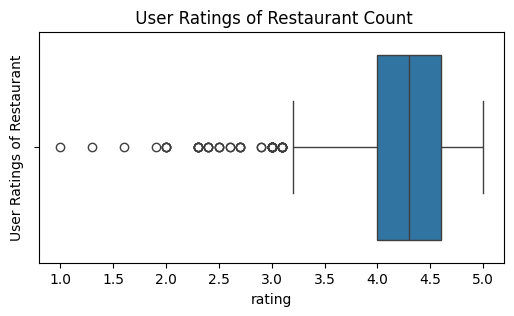

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 3))

sns.boxplot(x=df['rating'])

plt.ylabel('User Ratings of Restaurant')
plt.title(' User Ratings of Restaurant Count')

plt.show()


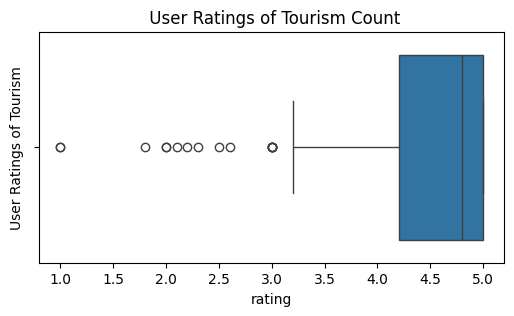

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 3))

sns.boxplot(x=df_tour['rating'])

plt.ylabel('User Ratings of Tourism')
plt.title(' User Ratings of Tourism Count')

plt.show()


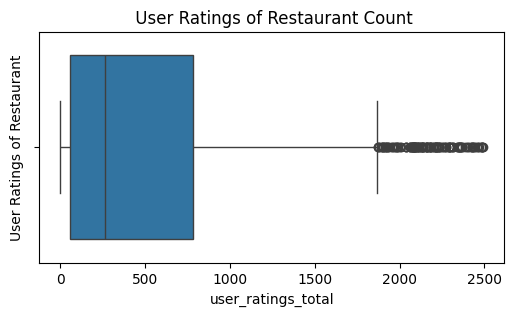

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 3))
df = df[df['user_ratings_total'] < 2500]
sns.boxplot(x=df['user_ratings_total'])

plt.ylabel('User Ratings of Restaurant')
plt.title(' User Ratings of Restaurant Count')

plt.show()


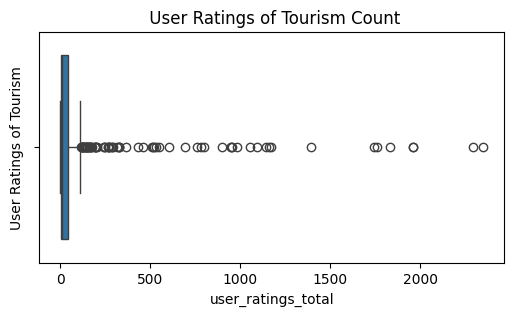

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 3))
df_tour = df_tour[df_tour['user_ratings_total'] < 2500]
sns.boxplot(x=df_tour['user_ratings_total'])

plt.ylabel('User Ratings of Tourism')
plt.title(' User Ratings of Tourism Count')

plt.show()


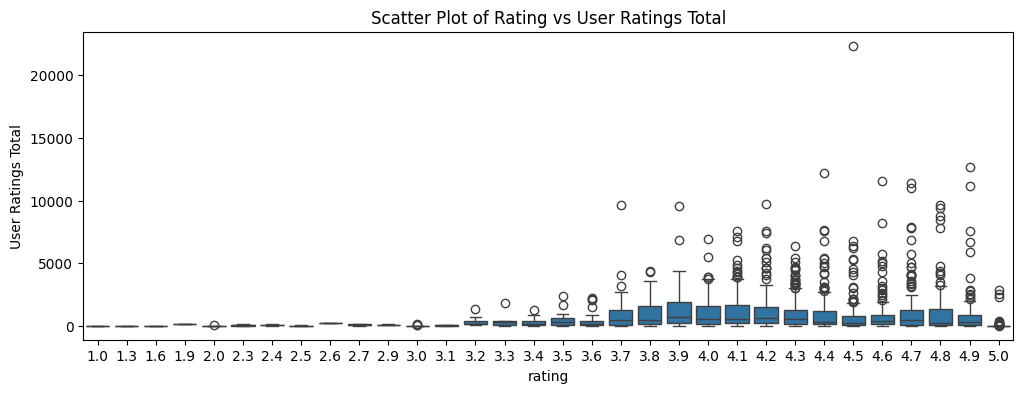

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))

sns.boxplot(x=df['rating'], y=df['user_ratings_total'])

plt.ylabel('User Ratings Total')
plt.title('Scatter Plot of Rating vs User Ratings Total')

plt.show()


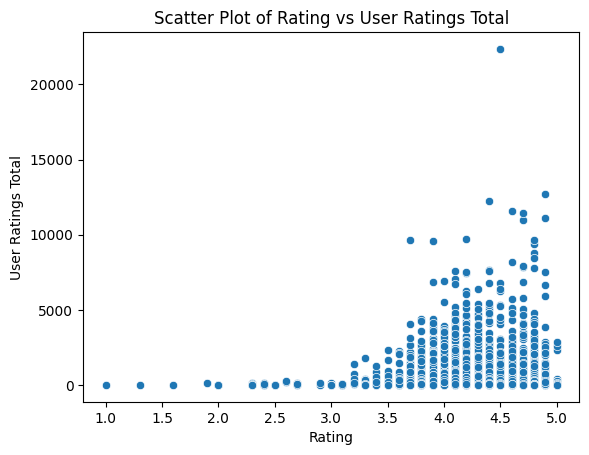

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df['rating'], y=df['user_ratings_total'])
plt.xlabel('integer')
plt.xlabel('Rating')
plt.ylabel('User Ratings Total')
plt.title('Scatter Plot of Rating vs User Ratings Total')

plt.show()


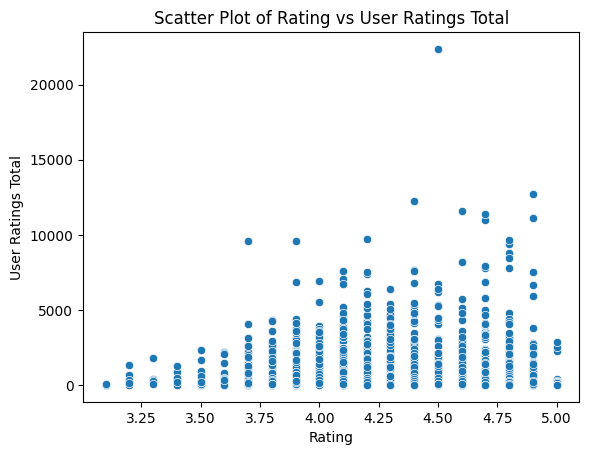

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df_outliner_total['rating'], y=df_outliner_total['user_ratings_total'])
plt.xlabel('Rating')
plt.ylabel('User Ratings Total')
plt.title('Scatter Plot of Rating vs User Ratings Total')

plt.show()

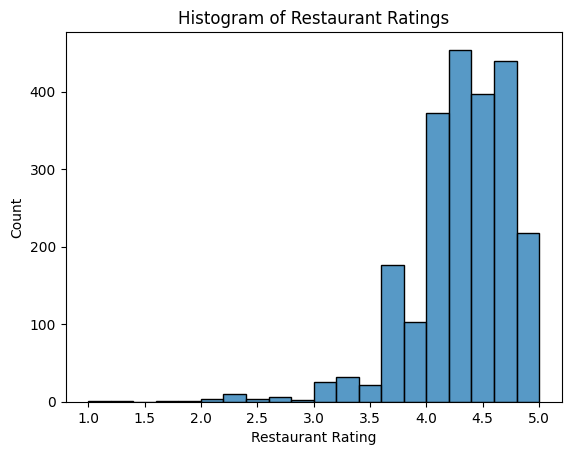

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['rating'], bins=20)  # `kde` adds a Kernel Density Estimate line
plt.xlabel('Restaurant Rating')
plt.ylabel('Count')
plt.title('Histogram of Restaurant Ratings')
plt.show()


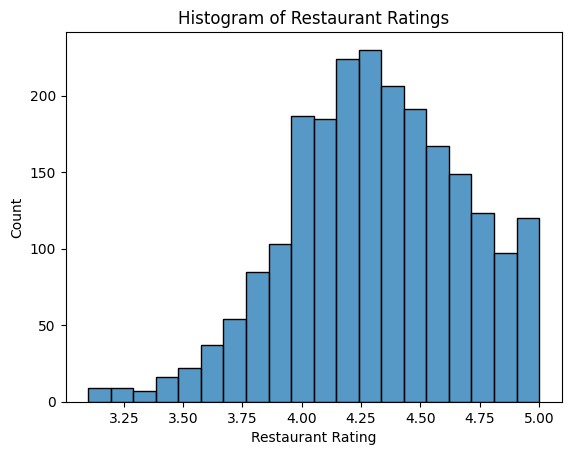

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_outliner['rating'], bins=20)  # `kde` adds a Kernel Density Estimate line
plt.xlabel('Restaurant Rating')
plt.ylabel('Count')
plt.title('Histogram of Restaurant Ratings')
plt.show()

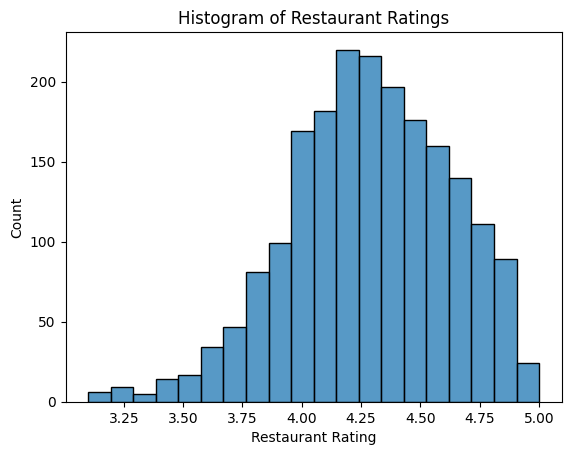

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_outliner_total['rating'], bins=20)  # `kde` adds a Kernel Density Estimate line
plt.xlabel('Restaurant Rating')
plt.ylabel('Count')
plt.title('Histogram of Restaurant Ratings')
plt.show()

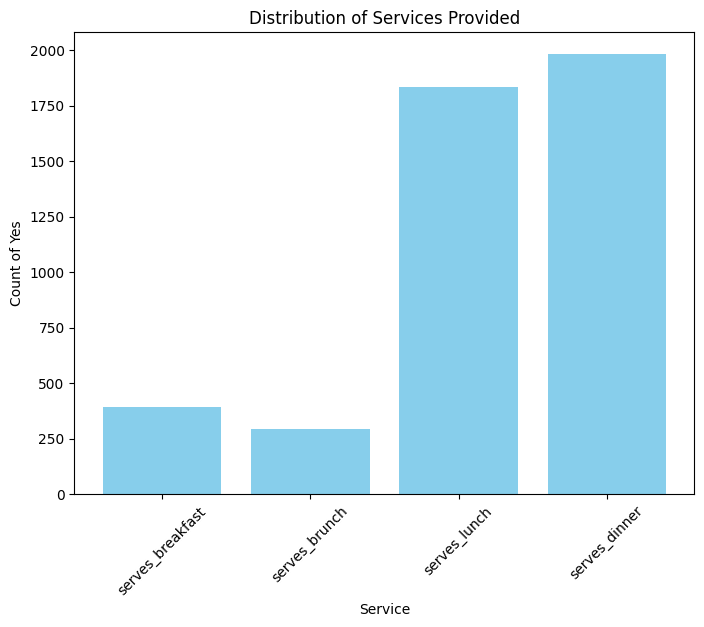

In [ ]:
import matplotlib.pyplot as plt

counts = df[['serves_breakfast', 'serves_brunch', 'serves_lunch', 'serves_dinner']].sum()
counts_df = counts.to_frame().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(counts_df['index'], counts_df[0], color='skyblue')
plt.title('Distribution of Services Provided')
plt.xlabel('Service')
plt.ylabel('Count of Yes')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of True for each column
counts = df[['serves_breakfast', 'serves_brunch', 'serves_lunch', 'serves_dinner']].sum(dtype=bool,skipna=True)

# Calculate the proportion of True for each service category
proportions = counts.compute() / len(df)

proportions


serves_breakfast    0.167305
serves_brunch       0.124734
serves_lunch        0.780758
serves_dinner       0.843338
dtype: float64

In [ ]:
# Calculate the mean rating for each service category
mean_rating_a = df.groupby(['serves_breakfast'])['rating'].mean()
mean_rating_b = df.groupby(['serves_brunch'])['rating'].mean()
mean_rating_c = df.groupby(['serves_lunch'])['rating'].mean()
mean_rating_d = df.groupby(['serves_dinner'])['rating'].mean()
#, 'serves_brunch', 'serves_lunch', 'serves_dinner'
mean_rating = [mean_rating_a.compute()[1],mean_rating_b.compute()[1],mean_rating_c.compute()[1],mean_rating_d.compute()[1]]

In [ ]:
mean_rating
index_mr = ['serves_breakfast', 'serves_brunch', 'serves_lunch', 'serves_dinner']

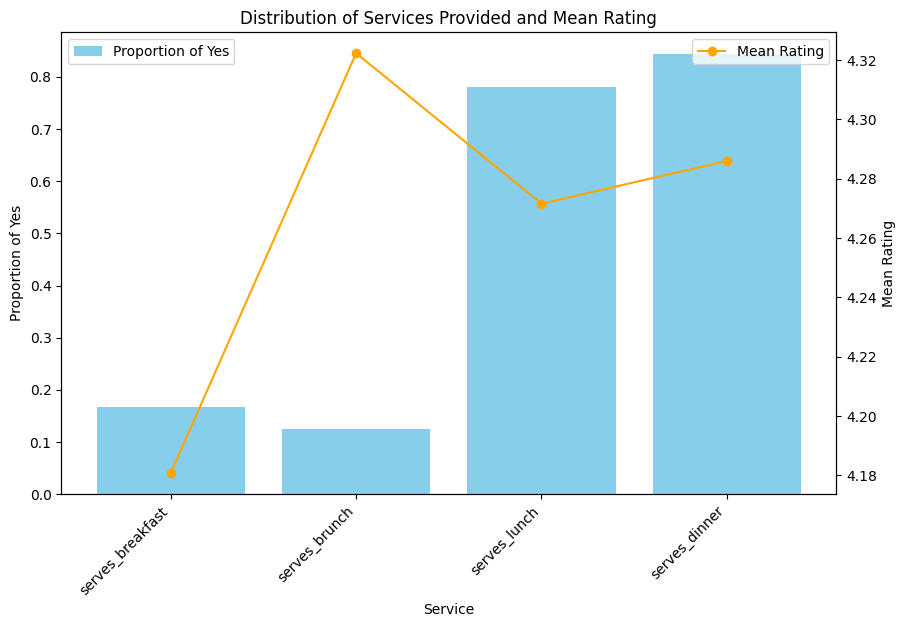

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))


# Plotting the proportions of services provided
ax1.bar(proportions.index, proportions, color='skyblue', label='Proportion of Yes')

# Creating a secondary y-axis for mean rating
ax2 = ax1.twinx()
ax2.plot(index_mr, mean_rating, color='orange', marker='o', label='Mean Rating')

# Adding labels and legend
ax1.set_xlabel('Service')
ax1.set_ylabel('Proportion of Yes')
ax2.set_ylabel('Mean Rating')
ax1.set_xticks(range(len(proportions.index)))

ax1.set_xticklabels(proportions.index, rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Distribution of Services Provided and Mean Rating')
plt.savefig("output.png")
plt.show()


In [ ]:
col = ['serves_breakfast', 'serves_brunch', 'serves_lunch', 'serves_dinner']
true_count= df['serves_breakfast'].value_counts().compute().get(True, 0)
false_count=df['serves_breakfast'].value_counts().compute().get(False, 0)
nan_count = df[col].isna().sum().compute()[0]

print(nan_count)
print(true_count)
print(false_count)

922
393
1034


In [ ]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd

row_length = len(df.index)

col = ['serves_breakfast', 'serves_brunch', 'serves_lunch', 'serves_dinner', 'serves_vegetarian_food']


# Function to count occurrences of NaN, True, and False for each column
def count_values(column):
    true_count= column.value_counts().compute().get(True, 0)
    false_count=column.value_counts().compute().get(False, 0)
    nan_count = column.isna().sum().compute()
    return pd.Series({'NaN': nan_count, 'True': true_count, 'False': false_count})

serves_breakfast = count_values(df['serves_breakfast'])/row_length
serves_brunch = count_values(df['serves_brunch'])/row_length
serves_lunch = count_values(df['serves_lunch'])/row_length
serves_dinner = count_values(df['serves_dinner'])/row_length
serves_vegetarian_food = count_values(df['serves_vegetarian_food'])/row_length
c_list = [serves_breakfast, serves_brunch, serves_lunch, serves_dinner, serves_vegetarian_food]
df_count = pd.DataFrame(c_list, index=['serves_breakfast', 'serves_brunch', 'serves_lunch', 'serves_dinner','serves_vegetarian_food'])




In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

# Assuming df_count is your DataFrame containing the data

# Create traces for each category with text
data1 = go.Bar(
    x=df_count.index,
    y=df_count['True'],
    name='True',
    text=[f'{val*100:.2f}%' for val in df_count['True']],  # List comprehension to format text labels
    textposition='auto'
)

data2 = go.Bar(
    x=df_count.index,
    y=df_count['False'],
    name='False',
    text=[f'{val*100:.2f}%' for val in df_count['False']],  # List comprehension to format text labels
    textposition='auto'
)
data3 = go.Bar(
    x=df_count.index,
    y=df_count['NaN'],
    name='NaN',
    text=[f'{val*100:.2f}%' for val in df_count['NaN']],  # Corrected format specifier
    textposition='auto'
)

# Combine the traces into a list
data = [data1, data2, data3]

# Define the layout with your settings
layout = go.Layout(
    barmode='stack',
    title='Percentage of NaN, False and True',
    titlefont=dict(family='Courier New, monospace', size=22, color='#7f7f7f'),
    xaxis=dict(
        titlefont=dict(size=16, color='rgb(107, 107, 107)'),
        tickfont=dict(size=16, color='rgb(107, 107, 107)')
    ),
    yaxis=dict(
        title='Percentage (%)',
        titlefont=dict(size=18),
        tickfont=dict(size=16, color='rgb(107, 107, 107)')
    ),
    margin=go.Margin(l=100, r=60, b=50, t=60, pad=0)
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Display the chart
py.iplot(fig)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-75-1c2ed5a8af62>, line 12)

In [ ]:
df_overlap = df[(df['serves_breakfast'] == True) & (df['serves_brunch'] == True)]
print(len(df_overlap))

191


In [ ]:
pip install plotly kaleido
fig.write_image("C:\Users\user\Desktop\debby\na value.png")

SyntaxError: invalid syntax (<ipython-input-45-37264afdf1a9>, line 1)

In [ ]:
print(proportions)

       serves_breakfast  serves_brunch  serves_lunch  serves_dinner
NaN            0.000000       0.000000      0.000000       0.000000
True           0.541347       0.540413      0.957236       0.990355
False          0.458653       0.459587      0.042764       0.009645


# tourist

In [ ]:
!pip install dask
import dask.dataframe as dd
import pandas as pd
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

# Load the R base library
base = importr('base')
dtype = {'user_ratings_total': 'int64'}
df_tour = dd.read_csv('/gdrive/Shareddrives/從資料學習2/Dataset & code/tour_data_output.csv', dtype=dtype)
id_tour = dd.read_csv('/gdrive/Shareddrives/從資料學習2/Dataset & code/tour_id_output.csv', dtype=dtype)

In [ ]:
import dask.dataframe as dd
dtype = {'user_ratings_total': 'float64'}
df_tour = dd.read_csv('/gdrive/Shareddrives/從資料學習2/Dataset & code/tour_data_output.csv', dtype=dtype)
print(df_tour)
df_tour.head()


In [ ]:
df_tour_outliner = df_tour[df_tour['rating'] > 3.0].compute()
length_df_tour_outliner = len(df_tour_outliner)

Q3_user_ratings_total = np.percentile(df_tour_outliner['user_ratings_total'], 10)
df_tour_outliner_total = df_tour_outliner[df_tour_outliner['user_ratings_total'] > Q3_user_ratings_total]
outliner_total_length = len(df_tour_outliner_total)

print(outliner_total_length)

print( length_df_tour_outliner)
print(outliner_total_length)

292
345
292


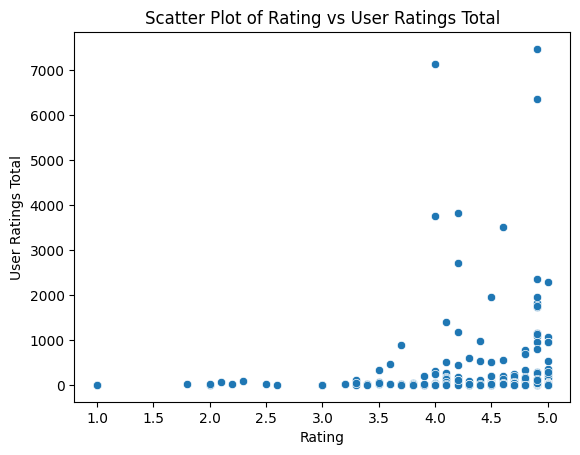

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df_tour['rating'], y=df_tour['user_ratings_total'])
plt.xlabel('Rating')
plt.ylabel('User Ratings Total')
plt.title('Scatter Plot of Rating vs User Ratings Total')

plt.show()

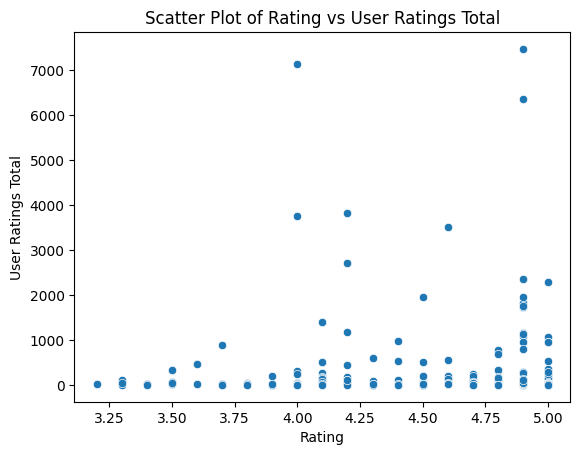

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df_tour_outliner['rating'], y=df_tour_outliner['user_ratings_total'])
plt.xlabel('Rating')
plt.ylabel('User Ratings Total')
plt.title('Scatter Plot of Rating vs User Ratings Total')

plt.show()

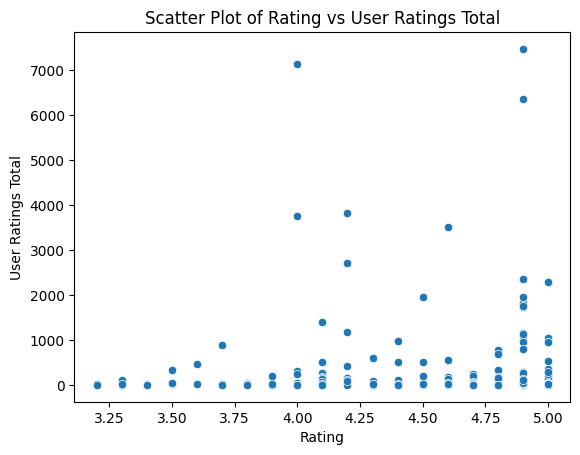

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df_tour_outliner_total['rating'], y=df_tour_outliner_total['user_ratings_total'])
plt.xlabel('Rating')
plt.ylabel('User Ratings Total')
plt.title('Scatter Plot of Rating vs User Ratings Total')

plt.show()

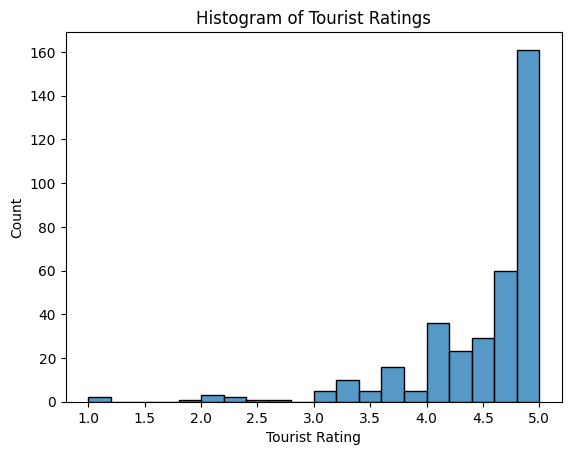

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_tour['rating'], bins=20)  # `kde` adds a Kernel Density Estimate line
plt.xlabel('Tourist Rating')
plt.ylabel('Count')
plt.title('Histogram of Tourist Ratings')
plt.show()

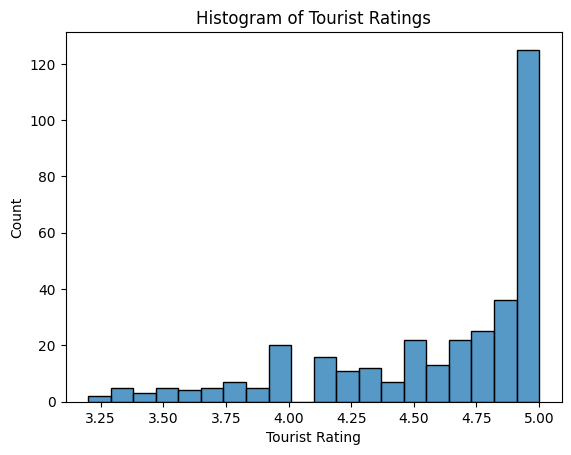

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_tour_outliner['rating'], bins=20)  # `kde` adds a Kernel Density Estimate line
plt.xlabel('Tourist Rating')
plt.ylabel('Count')
plt.title('Histogram of Tourist Ratings')
plt.show()

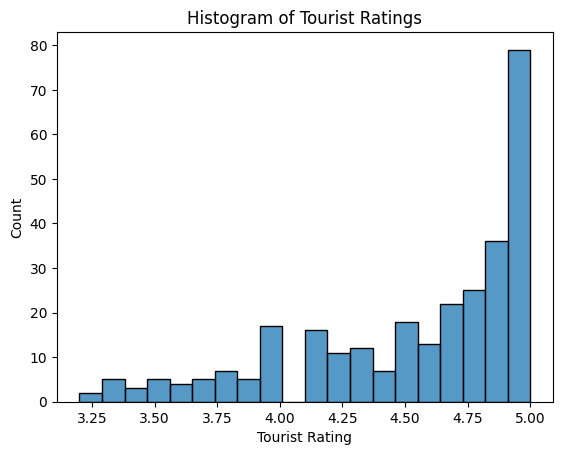

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_tour_outliner_total['rating'], bins=20)  # `kde` adds a Kernel Density Estimate line
plt.xlabel('Tourist Rating')
plt.ylabel('Count')
plt.title('Histogram of Tourist Ratings')
plt.show()

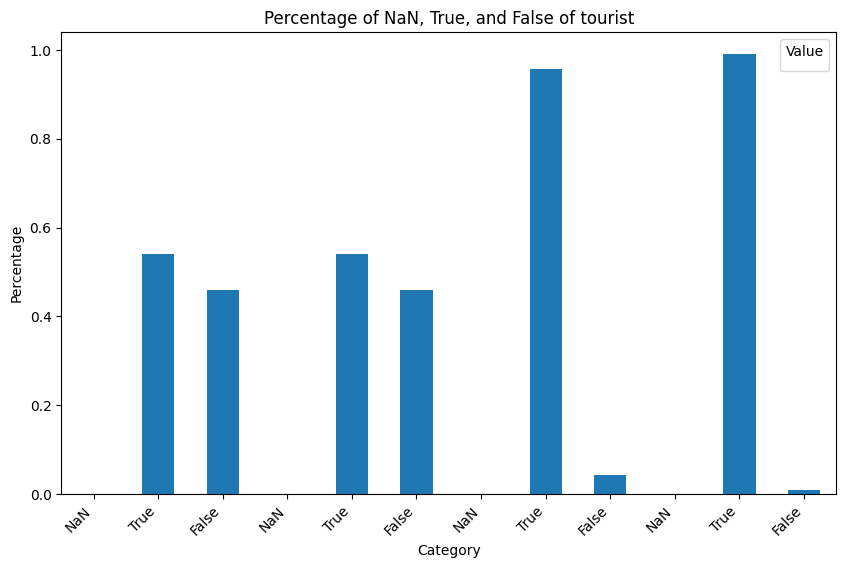

In [ ]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your Dask DataFrame containing the data
# Convert columns to boolean type
for col in ['serves_breakfast', 'serves_brunch', 'serves_lunch', 'serves_dinner']:
    df_tour[col] = df_tour[col].astype(bool)

# Function to count occurrences of NaN, True, and False for each column
def count_values(column):
    nan_count = column.isna().sum()
    true_count = column.sum()
    false_count = len(column) - nan_count - true_count
    return pd.Series({'NaN': nan_count, 'True': true_count, 'False': false_count})

# Count the occurrences of NaN, True, and False for each category
counts = df_tour[['serves_breakfast', 'serves_brunch', 'serves_lunch', 'serves_dinner']].map_partitions(lambda df_tour: df_tour.apply(count_values)).compute()

# Calculate the proportions of NaN, True, and False for each category
proportions_tour = counts / len(df_tour)

# Plot the stacked bar chart
ax = proportions.T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of NaN, True, and False of tourist')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Value')




In [ ]:
print(proportions_tour )

NameError: name 'proportions_tour' is not defined

In [ ]:
print(proportions_tour )

       serves_breakfast  serves_brunch  serves_lunch  serves_dinner
NaN                 0.0            0.0           0.0            0.0
True                1.0            1.0           1.0            1.0
False               0.0            0.0           0.0            0.0


In [ ]:
nan_counts = df_tour.isna().sum().compute()
print(nan_counts)


place_id                              0
name                                  0
business_status                       0
wheelchair_accessible_entrance     5334
type                                  0
rating                              259
editorial_summary                 12620
user_ratings_total                  259
price_level                       20767
formatted_phone_number            10117
formatted_address                     0
opening_hours                      1817
dine_in                           20773
delivery                          20766
location(lat,lng)                     0
reviews_text                          0
serves_breakfast                      0
serves_brunch                         0
serves_lunch                          0
serves_dinner                         0
serves_vegetarian_food            20777
dtype: int64


# hotel

In [ ]:
!pip install dask
import dask.dataframe as dd
import pandas as pd
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

# Load the R base library
base = importr('base')
dtype = {'user_ratings_total': 'int64'}
df_hotels = dd.read_csv('/gdrive/Shareddrives/從資料學習2/Dataset & code/hotels_data_output.csv', dtype=dtype)
id_hotels = dd.read_csv('/gdrive/Shareddrives/從資料學習2/Dataset & code/hotels_id_output.csv', dtype=dtype)

ERROR: Operation cancelled by user


In [ ]:
import dask.dataframe as dd
dtype = {'user_ratings_total': 'float64'}
df_hotels = dd.read_csv('/gdrive/Shareddrives/從資料學習2/Dataset & code/hotels_data_output.csv', dtype=dtype)
print(df_hotels)
df_hotels.head()

Dask DataFrame Structure:
              place_id    name business_status wheelchair_accessible_entrance    type   rating editorial_summary user_ratings_total price_level formatted_phone_number formatted_address opening_hours  dine_in delivery location(lat,lng) reviews_text serves_breakfast serves_brunch serves_lunch serves_dinner serves_vegetarian_food
npartitions=1                                                                                                                                                                                                                                                                                                                           
                object  object          object                           bool  object  float64            object            float64     float64                 object            object        object  float64  float64            object       object          float64       float64       object        object           

,place_id,name,business_status,wheelchair_accessible_entrance,type,rating,editorial_summary,user_ratings_total,price_level,formatted_phone_number,...,opening_hours,dine_in,delivery,"location(lat,lng)",reviews_text,serves_breakfast,serves_brunch,serves_lunch,serves_dinner,serves_vegetarian_food
0,ChIJqUjT6l2rQjQRmbXqxnua0rs,台北六福萬怡酒店,OPERATIONAL,True,"['lodging', 'point_of_interest', 'establishment']",4.2,"{'language': 'zh-TW', 'overview': '都會飯店提供寬敞的客房...",5845.0,NaN,02 2171 6565,...,NaN,NaN,NaN,"{'lat': 25.0529044, 'lng': 121.6064084}",['首先停車場到飯店路徑很奇妙，具體的說是要步行很遠，幾乎感覺走過馬路和兩個建築物再上電梯才...,NaN,NaN,NaN,NaN,NaN
1,ChIJ8yTxWq2uQjQRPx2hN4IMZ-Y,圓山大飯店,OPERATIONAL,True,"['lodging', 'point_of_interest', 'establishment']",4.4,"{'language': 'zh-TW', 'overview': '宮殿型飯店提供精緻的客...",21930.0,NaN,02 2886 8888,...,"{'open_now': True, 'periods': [{'open': {'day'...",NaN,NaN,"{'lat': 25.0789127, 'lng': 121.5265198}",['2/24至V.F十全軒替家母舉辦壽宴，完美落幕！\n\n當日宴會的餐點獲得家人一致好評。...,NaN,NaN,NaN,NaN,NaN
2,ChIJTSdlQZSrQjQRTGf6AJggr8c,茹曦酒店 ILLUME TAIPEI,OPERATIONAL,True,"['lodging', 'point_of_interest', 'establishment']",4.0,NaN,5686.0,NaN,02 2719 8399,...,NaN,NaN,NaN,"{'lat': 25.0526507, 'lng': 121.5482621}",['過年期間與家人在Sunny Buffet 用餐，當月壽星有生日優惠，四人同行一人免費，有...,NaN,NaN,True,True,NaN
3,ChIJBa1E152rQjQRnwWQP1HSkSc,台北松山意舍酒店,OPERATIONAL,True,"['lodging', 'point_of_interest', 'establishment']",4.3,"{'language': 'zh-TW', 'overview': '裝潢時尚的飯店提供現代...",2312.0,NaN,02 2653 2828,...,"{'open_now': True, 'periods': [{'open': {'day'...",NaN,NaN,"{'lat': 25.0493928, 'lng': 121.5803545}",['第一次上google留差評給住宿，1月初與家人入住，以本人名義共訂了六間雙人，其中一間是...,NaN,NaN,NaN,NaN,NaN
4,ChIJkwKVntOrQjQR4ihQw4LzzcU,台北美侖大飯店,OPERATIONAL,True,"['lodging', 'point_of_interest', 'establishment']",4.2,"{'language': 'zh-TW', 'overview': '現代風的高樓飯店提供簡...",1569.0,NaN,02 5579 3888,...,NaN,NaN,NaN,"{'lat': 25.0342784, 'lng': 121.5439044}","['沒想到大安竟然有這麼大的房間 這麼大的窗和陽台. 最厲害的是,101 就在你面前.\n紅...",NaN,NaN,NaN,NaN,NaN


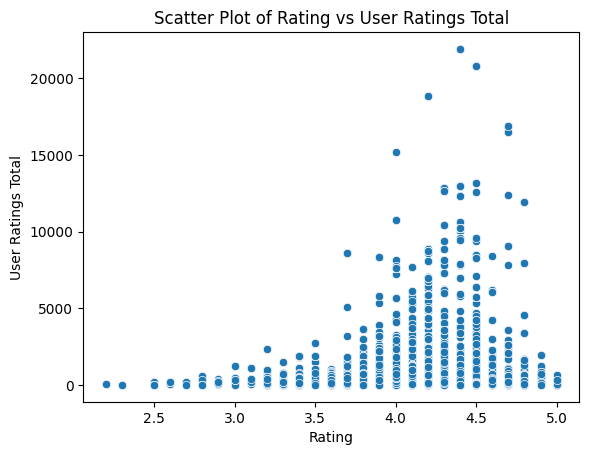

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df_hotels['rating'], y=df_hotels['user_ratings_total'])
plt.xlabel('Rating')
plt.ylabel('User Ratings Total')
plt.title('Scatter Plot of Rating vs User Ratings Total')

plt.show()

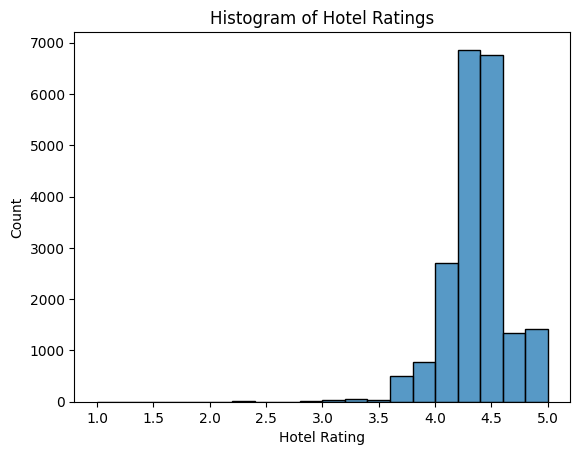

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_tour['rating'], bins=20)  # `kde` adds a Kernel Density Estimate line
plt.xlabel('Hotel Rating')
plt.ylabel('Count')
plt.title('Histogram of Hotel Ratings')
plt.show()

In [ ]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd

row_length = len(df.index)

col = ['serves_breakfast', 'serves_brunch', 'serves_lunch', 'serves_dinner']


# Function to count occurrences of NaN, True, and False for each column
def count_values(column):
    true_count= column.value_counts().compute().get(True, 0)
    false_count=column.value_counts().compute().get(False, 0)
    nan_count = column.isna().sum().compute()
    return pd.Series({'NaN': nan_count, 'True': true_count, 'False': false_count})

serves_breakfast = count_values(df['serves_breakfast'])/row_length
serves_brunch = count_values(df['serves_brunch'])/row_length
serves_lunch = count_values(df['serves_lunch'])/row_length
serves_dinner = count_values(df['serves_dinner'])/row_length
c_list = [serves_breakfast, serves_brunch, serves_lunch, serves_dinner]
df_count = pd.DataFrame(c_list, index=['serves_breakfast', 'serves_brunch', 'serves_lunch', 'serves_dinner'])




NameError: name 'df' is not defined

# Map

In [ ]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

geolocator = Nominatim(user_agent="geotest")

def extract_lat(location):
    lat_lng_dict = eval(location)  # Convert string to dictionary
    return lat_lng_dict['lat']

def extract_lng(location):
    lat_lng_dict = eval(location)  # Convert string to dictionary
    return lat_lng_dict['lng']

In [ ]:
df['lat'] = df['location(lat,lng)'].apply(extract_lat, meta=('float'))
df['lng'] = df['location(lat,lng)'].apply(extract_lng, meta=('float'))
df_outliner['lat'] = df_outliner['location(lat,lng)'].apply(extract_lat)
df_outliner['lng'] = df_outliner['location(lat,lng)'].apply(extract_lng)
df_outliner_total['lat'] = df_outliner_total['location(lat,lng)'].apply(extract_lat)
df_outliner_total['lng'] = df_outliner_total['location(lat,lng)'].apply(extract_lng)
df_tour['lat'] = df_tour['location(lat,lng)'].apply(extract_lat, meta=('float'))
df_tour['lng'] = df_tour['location(lat,lng)'].apply(extract_lng, meta=('float'))
df_tour_outliner['lat'] = df_tour_outliner['location(lat,lng)'].apply(extract_lat)
df_tour_outliner['lng'] = df_tour_outliner['location(lat,lng)'].apply(extract_lng)
df_tour_outliner_total['lat'] = df_tour_outliner_total['location(lat,lng)'].apply(extract_lat)
df_tour_outliner_total['lng'] = df_tour_outliner_total['location(lat,lng)'].apply(extract_lng)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:7084: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:7084: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(
<ipython-input-21-e640aaa09bed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [ ]:
import folium

# Create the Folium map
fmap = folium.Map(location=[25.043718, 121.532278], zoom_start=12)

# Iterate over each row in the DataFrame
for index, row in df_outliner_total.iterrows():
    # Set color based on rating
    if row['rating'] > 4:
        color = 'green'
    elif 3 <= row['rating'] <= 4:
        color = 'yellow'
    elif 2 <= row['rating'] < 3:
        color = 'orange'
    else:
        color = 'red'

    # Add a circle for each point
    fmap.add_child(folium.Circle(
        location=[row['lat'], row['lng']],
        color=color,
        radius=40,
        fill=True,
        fill_opacity=0.8
    ))

# Display the map
fmap


In [ ]:
import folium

# Create the Folium map
fmap = folium.Map(location=[25.043718, 121.532278], zoom_start=12)

# Iterate over each row in the DataFrame
for index, row in df_tour_outliner_total.iterrows():
    # Set color based on rating
    if row['rating'] > 4:
        color = 'green'
    elif 3 <= row['rating'] <= 4:
        color = 'yellow'
    elif 2 <= row['rating'] < 3:
        color = 'orange'
    else:
        color = 'red'

    # Add a circle for each point
    fmap.add_child(folium.Circle(
        location=[row['lat'], row['lng']],
        color=color,
        radius=40,
        fill=True,
        fill_opacity=0.8
    ))

# Display the map
fmap


In [ ]:
import dask.dataframe as dd

# Assuming df_tour is a Dask DataFrame
df_tour['user_ratings_total'] = df_tour['user_ratings_total'].fillna(0).astype('int64')
df_tour = df_tour.compute()


In [ ]:
df_tour.head(5)

In [ ]:
df_outliner_total['lat'] = df_outliner_total['location(lat,lng)'].apply(extract_lat)
df_outliner_total['lng'] = df_outliner_total['location(lat,lng)'].apply(extract_lng)



<ipython-input-38-02d0505315b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliner_total['lat'] = df_outliner_total['location(lat,lng)'].apply(extract_lat)
<ipython-input-38-02d0505315b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliner_total['lng'] = df_outliner_total['location(lat,lng)'].apply(extract_lng)


In [ ]:
import folium

# Create the Folium map
fmap_3 = folium.Map(location=[25.043718, 121.532278], zoom_start=12)

# Iterate over each row in the DataFrame
for index, row in df_tour_outliner_total.iterrows():
    # Add a circle for each point
    fmap_3.add_child(folium.Circle(
        location=[row['lat'], row['lng']],
        color='red',
        radius=40,
        fill=True,
        fill_opacity=0.8
    ))
for index, row in df_outliner_total.iterrows():
    # Add a circle for each point
    fmap_3.add_child(folium.Circle(
        location=[row['lat'], row['lng']],
        color='yellow',
        radius=40,
        fill=True,
        fill_opacity=0.8
    ))
#for index, row in df_hotels.iterrows():
    # Add a circle for each point
  #  fmap_3.add_child(folium.Circle(
  #      location=[row['lat'], row['lng']],
  #      color='red',
  #      radius=40,
  #      fill=True,
  #      fill_opacity=0.8
  #  ))
# Display the map
fmap_3


In [ ]:
df_outliner['serves_breakfast'] = df_outliner['serves_breakfast'].astype(bool)
df_outliner['serves_brunch'] = df_outliner['serves_brunch'].astype(bool)
df_outliner['serves_lunch'] = df_outliner['serves_lunch'].astype(bool)
df_outliner['serves_dinner'] = df_outliner['serves_dinner'].astype(bool)

df_breakfast_outliner = df_outliner[df_outliner['serves_breakfast']|df_outliner['serves_brunch']|df_outliner['serves_lunch']|df_outliner['serves_dinner']]
df_brunch_outliner = df_outliner[df_outliner['serves_brunch']|df_outliner['serves_lunch']]
df_lunch_outliner = df_outliner[df_outliner['serves_lunch']|df_outliner['serves_dinner']]
df_dinner_outliner = df_outliner[df_outliner['serves_dinner']|df_outliner['serves_breakfast']]


In [ ]:
df_breakfast_outliner = df_outliner[(df_outliner['serves_breakfast'] == True) & (df_outliner['serves_lunch'] == False) & (df_outliner['serves_brunch'] == False)  & (df_outliner['serves_dinner'] == False)]
df_brunch_outliner = df_outliner[(df_outliner['serves_breakfast'] == False) & (df_outliner['serves_lunch'] == False) & (df_outliner['serves_brunch'] == True)  & (df_outliner['serves_dinner'] == False)]
df_lunch_outliner = df_outliner[(df_outliner['serves_breakfast'] == False) & (df_outliner['serves_lunch'] == True) & (df_outliner['serves_brunch'] == False)  & (df_outliner['serves_dinner'] == False)]
df_dinner_outliner = df_outliner[(df_outliner['serves_breakfast'] == False) & (df_outliner['serves_lunch'] == False) & (df_outliner['serves_brunch'] == False)  & (df_outliner['serves_dinner'] == True)]

breakfast_brunch_dataset =df_outliner[(df_outliner['serves_breakfast'] == True) & (df_outliner['serves_lunch'] == False) & (df_outliner['serves_brunch'] == True)  & (df_outliner['serves_dinner'] == False)]
breakfast_lunch_dataset = df_outliner[(df_outliner['serves_breakfast'] == True) & (df_outliner['serves_lunch'] == True) & (df_outliner['serves_brunch'] == False)  & (df_outliner['serves_dinner'] == False)]
breakfast_dinner_dataset = df_outliner[(df_outliner['serves_breakfast'] == True) & (df_outliner['serves_lunch'] == False) & (df_outliner['serves_brunch'] == False)  & (df_outliner['serves_dinner'] == True)]
lunch_brunch_dataset = df_outliner[(df_outliner['serves_breakfast'] == False) & (df_outliner['serves_lunch'] == True) & (df_outliner['serves_brunch'] == True)  & (df_outliner['serves_dinner'] == False)]
brunch_dinner_dataset =df_outliner[(df_outliner['serves_breakfast'] == False) & (df_outliner['serves_lunch'] == False) & (df_outliner['serves_brunch'] == True)  & (df_outliner['serves_dinner'] == True)]
lunch_dinner_dataset = df_outliner[(df_outliner['serves_breakfast'] == False) & (df_outliner['serves_lunch'] == True) & (df_outliner['serves_brunch'] == False)  & (df_outliner['serves_dinner'] == True)]

breakfast_brunch_lunch_dataset = df_outliner[(df_outliner['serves_breakfast'] == True) & (df_outliner['serves_lunch'] == True) & (df_outliner['serves_brunch'] == True)  & (df_outliner['serves_dinner'] == False)]
breakfast_brunch_dinner_dataset = df_outliner[(df_outliner['serves_breakfast'] == True) & (df_outliner['serves_lunch'] == False) & (df_outliner['serves_brunch'] == True)  & (df_outliner['serves_dinner'] == True)]
breakfast_lunch_dinner_dataset = df_outliner[(df_outliner['serves_breakfast'] == True) & (df_outliner['serves_lunch'] == True) & (df_outliner['serves_brunch'] == False)  & (df_outliner['serves_dinner'] == True)]
brunch_lunch_dinner_dataset =df_outliner[(df_outliner['serves_breakfast'] == False) & (df_outliner['serves_lunch'] == True) & (df_outliner['serves_brunch'] == True)  & (df_outliner['serves_dinner'] == True)]

all_dataset = df_outliner[(df_outliner['serves_breakfast'] == True) & (df_outliner['serves_lunch'] == True) & (df_outliner['serves_brunch'] == True)  & (df_outliner['serves_dinner'] == True)]




In [ ]:
print(len(df_breakfast_outliner))0
print(len(df_brunch_outliner))0
print(len(df_lunch_outliner))5
print(len(df_dinner_outliner))38

print(len(breakfast_brunch_dataset))1
print(len(breakfast_lunch_dataset))1
print(len(breakfast_dinner_dataset))1
print(len(lunch_brunch_dataset))0
print(len(brunch_dinner_dataset))3
print(len(lunch_dinner_dataset))765


print(len(breakfast_brunch_lunch_dataset))37
print(len(breakfast_brunch_dinner_dataset))2
print(len(breakfast_lunch_dinner_dataset))190
print(len(brunch_lunch_dinner_dataset))188

print(len(all_dataset))958


0
0
5
38
1
1
1
0
3
795
37
2
190
188
958


In [ ]:
df_breakfast_outliner.head()

,place_id,name,business_status,wheelchair_accessible_entrance,type,rating,editorial_summary,user_ratings_total,price_level,formatted_phone_number,...,"location(lat,lng)",reviews_text,serves_breakfast,serves_brunch,serves_lunch,serves_dinner,serves_vegetarian_food,keywords,lat,lng


In [ ]:
from dask.distributed import Client
import dask.dataframe as dd
from geopy.geocoders import Nominatim
import pandas as pd

client = Client()

def reverse_geocode_partition(df):
    geolocator = Nominatim(user_agent="geotest")
    df['location'] = df.apply(lambda row: geolocator.reverse((row['lat'], row['lng'])).address, axis=1)
    return df

meta = df._meta.assign(location='')
df_with_location = df.map_partitions(reverse_geocode_partition, meta=meta)
